# | house_price.csv 분석

In [23]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')
DF.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [24]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


# | 문자형 변수 확인

In [26]:
DF[['neighborhood','style']].head(10)

,neighborhood,style
0,B,ranch
1,B,victorian
2,B,ranch
3,A,ranch
4,B,victorian
5,C,lodge
6,B,victorian
7,C,victorian
8,A,ranch
9,A,victorian


## 문자형 변수 - value_counts로 범주수 확인

In [29]:
DF['neighborhood'].value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [30]:
DF['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

## with LabelEncoder 인코딩

In [32]:
x = DF['neighborhood']
y = DF['style']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
neighborhood = encoder.fit_transform(x)
style = encoder.fit_transform(y)

## 데이터프레임에 바꾼 값 넣기

In [33]:
DF[['neighborhood']] = neighborhood
DF.neighborhood.head(10)

0    1
1    1
2    1
3    0
4    1
5    2
6    1
7    2
8    0
9    0
Name: neighborhood, dtype: int64

In [34]:
DF[['style']] = style
DF[['style']].head(10)

,style
0,1
1,2
2,1
3,1
4,2
5,0
6,2
7,2
8,1
9,2


In [35]:
DF.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,1,1188,3,2,1,598291
1,491,1,3512,5,3,2,1744259
2,5952,1,1134,3,2,1,571669
3,3525,0,1940,4,2,1,493675
4,5108,1,2208,6,4,2,1101539


In [37]:
DF = DF[['neighborhood','area','bedrooms','bathrooms','style','price']]
DF.head()

,neighborhood,area,bedrooms,bathrooms,style,price
0,1,1188,3,2,1,598291
1,1,3512,5,3,2,1744259
2,1,1134,3,2,1,571669
3,0,1940,4,2,1,493675
4,1,2208,6,4,2,1101539


# | 데이터 분석 그래프

## sns.pairplot

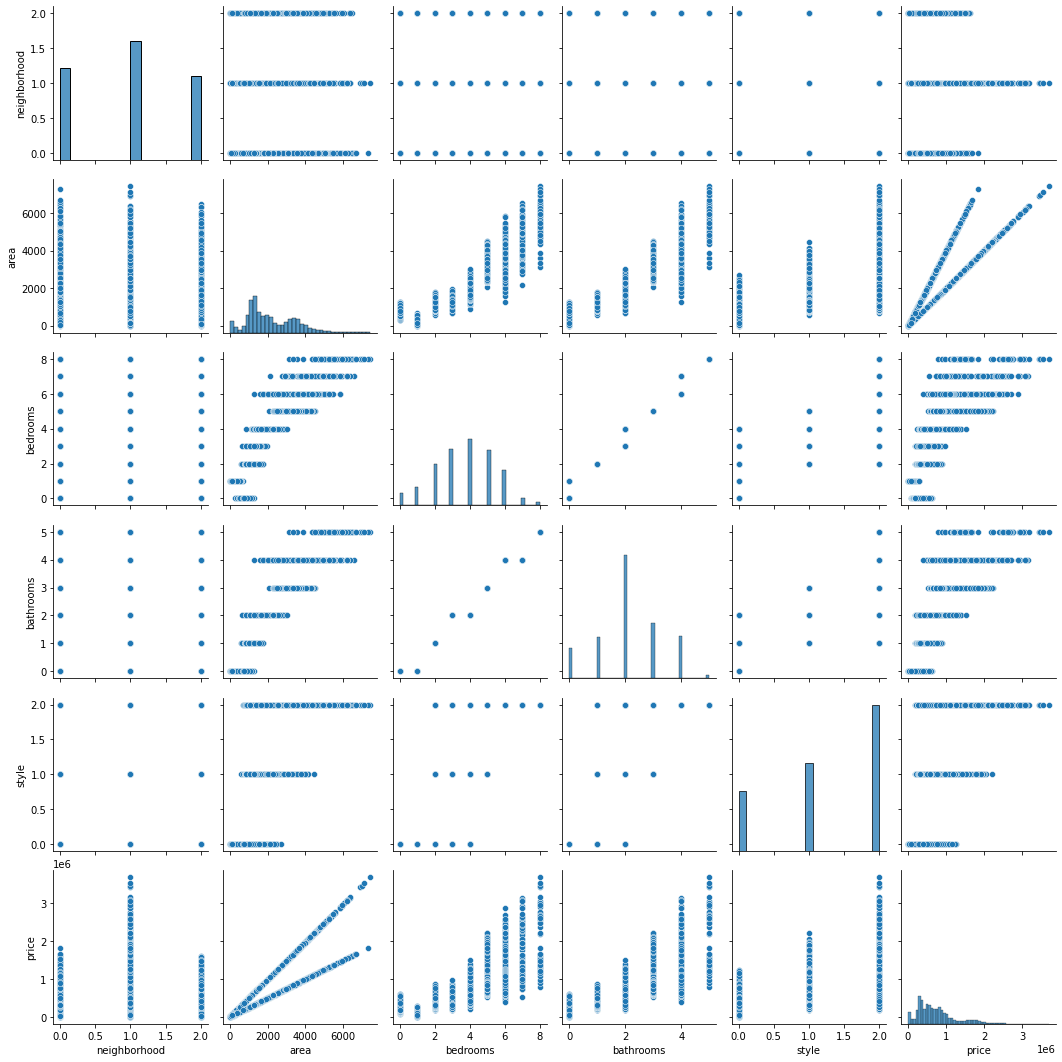

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(DF)
plt.show()

## distplot (전체 price) 분포

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


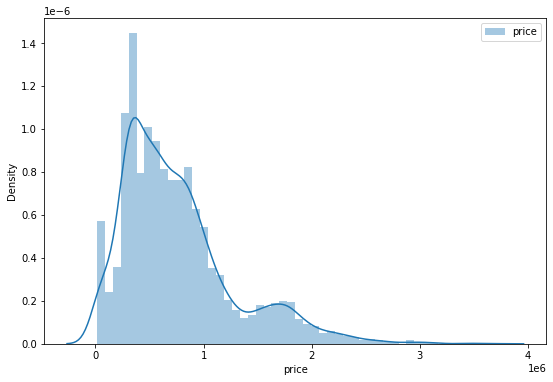

In [46]:
plt.figure(figsize = (9,6))
sns.distplot(DF.price, label='price',
             hist=True, kde= True)
plt.legend(loc='best')
plt.show()

## boxplot

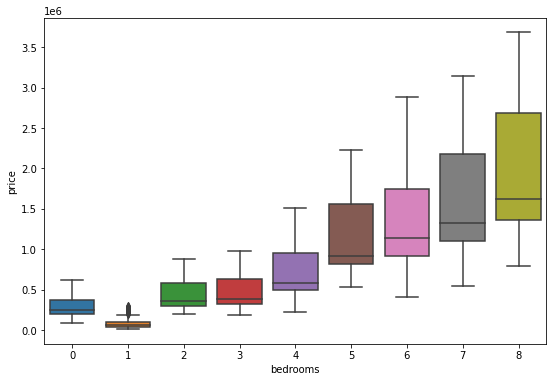

In [47]:
plt.figure(figsize = (9, 6))
sns.boxplot(x='bedrooms', y='price', data = DF)
plt.show()

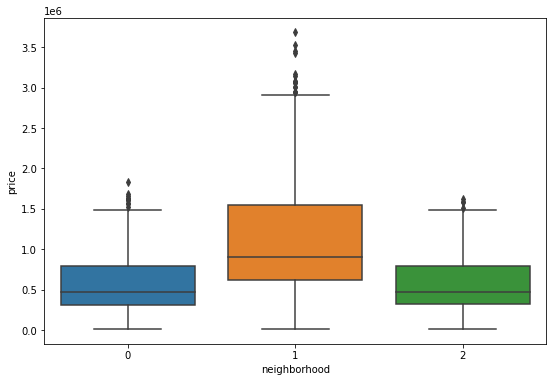

In [48]:
plt.figure(figsize = (9, 6))
sns.boxplot(x='neighborhood', y='price', data = DF)
plt.show()

# | price scaling

## with Normalization/ MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# || area vs, bedrooms  - 왜 일차선이 두개일까?

## 상관계수 pearson's r/ corrcoef



In [50]:
from scipy import stats

stats.pearsonr(DF.area, DF.bedrooms)[0]

0.9016225647662287

## regplot

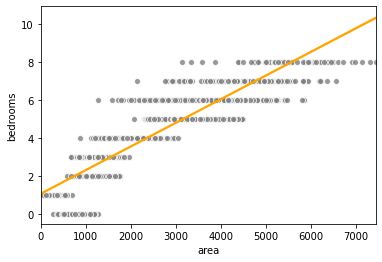

In [51]:
sns.regplot(x='area', y='bedrooms', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

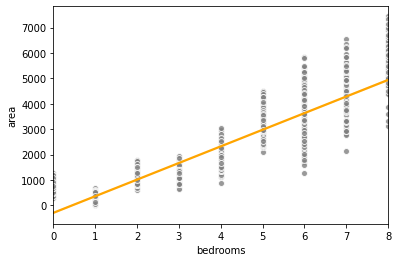

In [52]:
sns.regplot(x='bedrooms', y='area', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

# || bedrooms vs. price 

## regplot

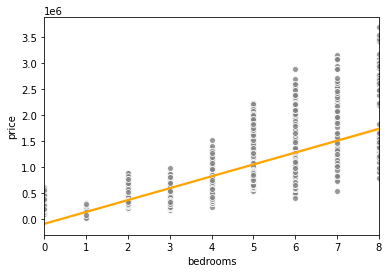

In [93]:
sns.regplot(x='bedrooms', y='price', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

## 1) 상관계수

In [54]:
from scipy import stats

stats.pearsonr(DF.bedrooms, DF.price)[0]

0.7434351418523943

## 2) split - train : test = 7 : 3

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['bedrooms']], DF[['price']], test_size=0.3,
                                                    random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


In [62]:
from sklearn.linear_model import LinearRegression

Model_bp = LinearRegression()
Model_bp.fit(x_train, y_train)

y_hat_bp = Model_bp.predict(x_test)
from sklearn.metrics import mean_squared_error
Err_bp = mean_squared_error(y_test,y_hat_bp)
Err_bp

124617371698.03279

## 3) High order split = train : test = 7 : 3

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['bedrooms']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias= False)
PX_2 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_bp_2 = LinearRegression()
Model_bp_2.fit(PX_2, y_train)

PX_2_hat = poly.fit_transform(x_test)
y_hat_bp_2 = Model_bp_2.predict(PX_2_hat)

from sklearn.metrics import mean_squared_error

Err_bp_2 = mean_squared_error(y_test, y_hat_bp_2)
Err_bp_2

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


115865636713.87029

In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['bedrooms']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias= False)
PX_4 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_bp_4 = LinearRegression()
Model_bp_4.fit(PX_4, y_train)

PX_4_hat = poly.fit_transform(x_test)
y_hat_bp_4 = Model_bp_4.predict(PX_4_hat)

from sklearn.metrics import mean_squared_error

Err_bp_4 = mean_squared_error(y_test, y_hat_bp_4)
Err_bp_4

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


113864619421.11243

In [68]:
y= DF.price

## 4) Visualization (3개 함수)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

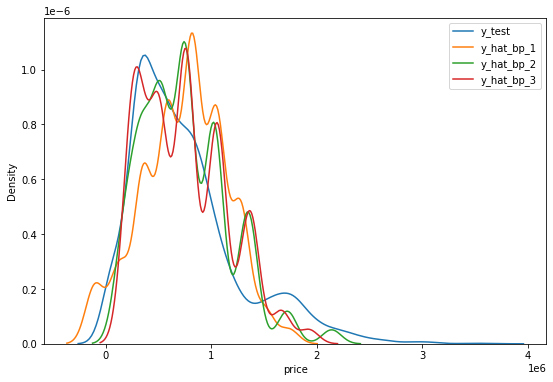

In [90]:
plt.figure(figsize=(9,6))
ax1 = sns.distplot(y, hist =False, label='y_test')
ax2 = sns.distplot(y_hat_bp, hist =False, label='y_hat_bp_1', ax=ax1)
ax3 = sns.distplot(y_hat_bp_2, hist =False, label='y_hat_bp_2', ax=ax1)
ax4 = sns.distplot(y_hat_bp_3, hist =False, label='y_hat_bp_3', ax=ax1)
#plt.ylim(0,0.07)
plt.legend(loc='best')
plt.show()

## 5) 3개 함수 MSE 비교

In [75]:
print('1차식 MSE : ', Err_bp)
print('2차식 MSE : ', Err_bp_2)
print('4차식 MSE : ', Err_bp_4)

1차식 MSE :  124617371698.03279
2차식 MSE :  115865636713.87029
4차식 MSE :  113864619421.11243


## 6) 결정계수

In [128]:
Model_bp_4.score(PX_4_hat, y_test)


0.5867606343080425

# || area vs. price

## regplot

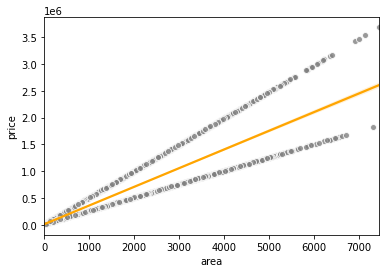

In [95]:
sns.regplot(x='area', y='price', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

## 1) 상관계수

In [55]:
from scipy import stats

stats.pearsonr(DF.area, DF.price)[0]

0.8234537182735618

## 2) split - train : test = 7 : 3

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['area']], DF[['price']], test_size=0.3,
                                                    random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

Model_ap = LinearRegression()
Model_ap.fit(x_train, y_train)

y_hat_ap = Model_ap.predict(x_test)
from sklearn.metrics import mean_squared_error
Err_ap = mean_squared_error(y_test,y_hat_ap)
Err_ap

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


88607832178.18301

## 3) High order split = train : test = 7 : 3

In [133]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['area']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias= False)
PX_2 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_ap_2 = LinearRegression()
Model_ap_2.fit(PX_2, y_train)

PX_2_hat = poly.fit_transform(x_test)
y_hat_ap_2 = Model_ap_2.predict(PX_2_hat)

from sklearn.metrics import mean_squared_error

Err_ap_2 = mean_squared_error(y_test, y_hat_ap_2)
Err_ap_2

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


88778182097.60945

In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['area']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4, include_bias= False)
PX_4 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_ap_4 = LinearRegression()
Model_ap_4.fit(PX_4, y_train)

PX_4_hat = poly.fit_transform(x_test)
y_hat_ap_4 = Model_ap_4.predict(PX_4_hat)

from sklearn.metrics import mean_squared_error

Err_ap_4 = mean_squared_error(y_test, y_hat_ap_4)
Err_ap_4

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


88837715564.45564

## 4) Visualization (3개 함수)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

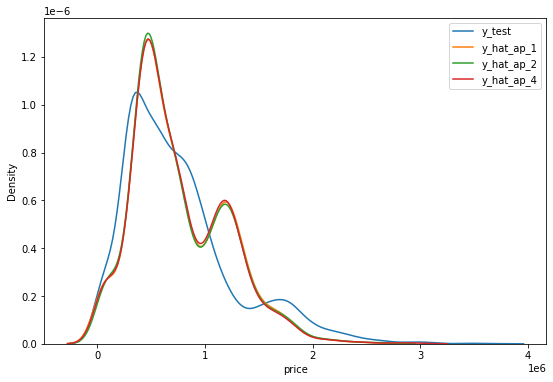

In [91]:
y= DF.price

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y, hist =False, label='y_test')
ax2 = sns.distplot(y_hat_ap, hist =False, label='y_hat_ap_1', ax=ax1)
ax3 = sns.distplot(y_hat_ap_2, hist =False, label='y_hat_ap_2', ax=ax1)
ax4 = sns.distplot(y_hat_ap_4, hist =False, label='y_hat_ap_4', ax=ax1)
#plt.ylim(0,0.07)
plt.legend(loc='best')
plt.show()

## 5) 3개 함수 MSE 비교

In [ ]:
print('1차식 MSE : ', Err_ap)
print('2차식 MSE : ', Err_ap_2)
print('4차식 MSE : ', Err_ap_4)

1차식 MSE :  88607832178.18301
2차식 MSE :  88778182097.60945
4차식 MSE :  88837715564.45564


## 6) 결정계수

In [137]:
Model_ap.score(x_test, y_test)

0.6784229855524156

# || style vs. price

## regplot

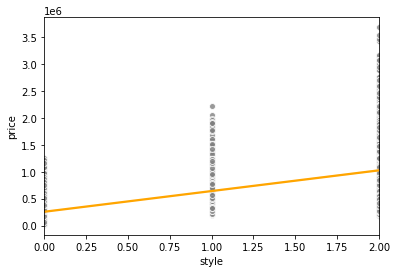

In [100]:
sns.regplot(x='style', y='price', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

## 1) 상관계수

In [56]:
from scipy import stats

stats.pearsonr(DF.area, DF.price)[0]

0.8234537182735618

## 2) split - train : test = 7 : 3

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['style']], DF[['price']], test_size=0.3,
                                                    random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

Model_sp = LinearRegression()
Model_sp.fit(x_train, y_train)

y_hat_sp = Model_sp.predict(x_test)
from sklearn.metrics import mean_squared_error
Err_sp = mean_squared_error(y_test,y_hat_sp)
Err_sp

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


185367393986.7433

## 3) High order split = train : test = 7 : 3

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['style']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias= False)
PX_2 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_sp_2 = LinearRegression()
Model_sp_2.fit(PX_2, y_train)

PX_2_hat = poly.fit_transform(x_test)
y_hat_sp_2 = Model_sp_2.predict(PX_2_hat)

from sklearn.metrics import mean_squared_error

Err_sp_2 = mean_squared_error(y_test, y_hat_sp_2)
Err_sp_2

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


183646952070.8886

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['style']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias= False)
PX_9 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_sp_9 = LinearRegression()
Model_sp_9.fit(PX_9, y_train)

PX_9_hat = poly.fit_transform(x_test)
y_hat_sp_9 = Model_sp_9.predict(PX_9_hat)

from sklearn.metrics import mean_squared_error

Err_sp_9 = mean_squared_error(y_test, y_hat_sp_9)
Err_sp_9

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


183648588377.09528

## 4) Visualization (3개 함수)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

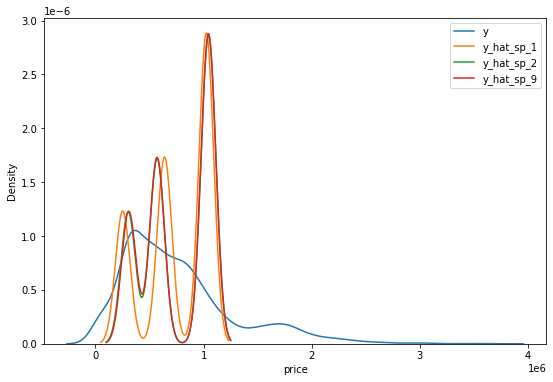

In [102]:
y= DF.price

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat_sp, hist =False, label='y_hat_sp_1', ax=ax1)
ax3 = sns.distplot(y_hat_sp_2, hist =False, label='y_hat_sp_2', ax=ax1)
ax4 = sns.distplot(y_hat_sp_9, hist =False, label='y_hat_sp_9', ax=ax1)
#plt.ylim(0,0.07)
plt.legend(loc='best')
plt.show()

## 5) 3개 함수 MSE 비교

In [138]:
print('1차식 MSE : ', Err_sp)
print('2차식 MSE : ', Err_sp_2)
print('9차식 MSE : ', Err_sp_9)

1차식 MSE :  185367393986.7433
2차식 MSE :  183646952070.8886
9차식 MSE :  183648588377.09528


## 6) 결정계수

In [140]:
Model_sp_9.score(PX_9_hat, y_test)

0.33349949653366323

# || neigborhood vs. price

## regplot

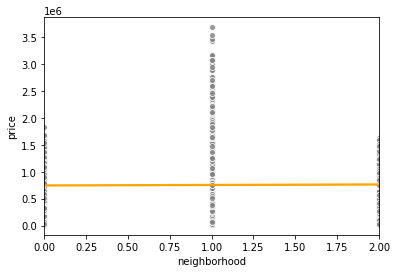

In [107]:
sns.regplot(x='neighborhood', y='price', data=DF, line_kws={'color':'orange'},
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.show()

## 1) 상관계수

In [57]:
from scipy import stats

stats.pearsonr(DF.neighborhood, DF.price)[0]

0.01296008749454833

## 2) split - train : test = 7 : 3

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['neighborhood']], DF[['price']], test_size=0.3,
                                                    random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

Model_np = LinearRegression()
Model_np.fit(x_train, y_train)

y_hat_np = Model_np.predict(x_test)
from sklearn.metrics import mean_squared_error
Err_np = mean_squared_error(y_test,y_hat_np)
Err_np

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


275470408658.34265

## 3) High order split = train : test = 7 : 3

In [141]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['neighborhood']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias= False)
PX_2 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_np_2 = LinearRegression()
Model_np_2.fit(PX_2, y_train)

PX_2_hat = poly.fit_transform(x_test)
y_hat_np_2 = Model_np_2.predict(PX_2_hat)

from sklearn.metrics import mean_squared_error

Err_np_2 = mean_squared_error(y_test, y_hat_np_2)
Err_np_2

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


208519032036.05472

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(DF[['neighborhood']], DF[['price']],
                                                    test_size = 0.3, random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias= False)
PX_5 = poly.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

Model_np_5 = LinearRegression()
Model_np_5.fit(PX_5, y_train)

PX_5_hat = poly.fit_transform(x_test)
y_hat_np_5 = Model_np_5.predict(PX_5_hat)

from sklearn.metrics import mean_squared_error

Err_np_5 = mean_squared_error(y_test, y_hat_np_5)
Err_np_5

(4219, 1) (4219, 1)
(1809, 1) (1809, 1)


208534229420.6904

## 4) Visualization (3개 함수)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

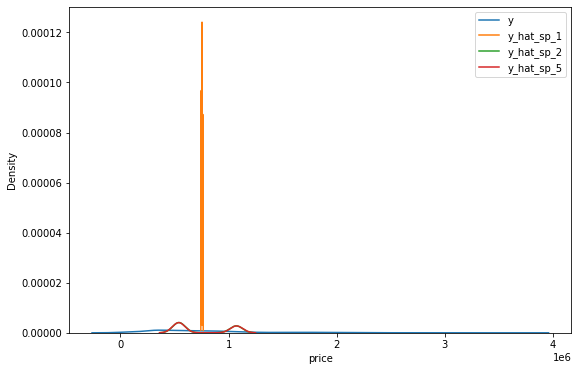

In [112]:
y= DF.price

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat_np, hist =False, label='y_hat_sp_1', ax=ax1)
ax3 = sns.distplot(y_hat_np_2, hist =False, label='y_hat_sp_2', ax=ax1)
ax4 = sns.distplot(y_hat_np_5, hist =False, label='y_hat_sp_5', ax=ax1)
#plt.ylim(-0.02,0.07)
plt.legend(loc='best')
plt.show()

## 5) 3개 함수 MSE 비교

In [115]:
print('1차식 MSE : ', Err_np)
print('2차식 MSE : ', Err_np_2)
print('4차식 MSE : ', Err_np_5)

1차식 MSE :  275470408658.34265
2차식 MSE :  208519032036.05472
4차식 MSE :  208534229420.6904


## 6) 결정계수

In [143]:
Model_np_2.score(PX_2_hat, y_test)

0.24323926983324928

# 【 다중회귀 】

## area vs. bedrooms vs. price

### 1) split - train : test = 7 : 3

In [144]:
from sklearn.model_selection import train_test_split

x = DF[['area','bedrooms']]
y = DF[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3,
                                                    random_state = 2045)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

Model_abp = LinearRegression()
Model_abp.fit(x_train, y_train)

y_hat_abp = Model_abp.predict(x_test)
from sklearn.metrics import mean_squared_error
Err_abp = mean_squared_error(y_test,y_hat_abp)
Err_abp

(4219, 2) (4219, 1)
(1809, 2) (1809, 1)


88606327437.57784

### 2) Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


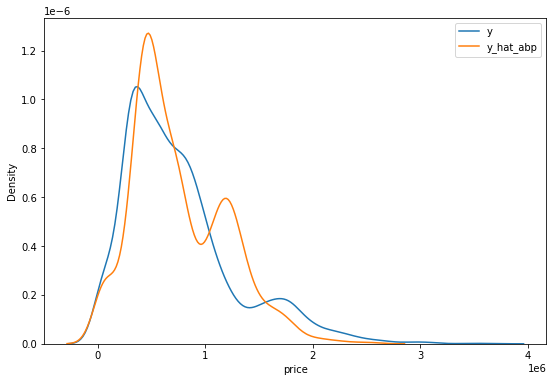

In [146]:
y= DF.price

plt.figure(figsize=(9,6))
ax1 = sns.distplot(y, hist =False, label='y')
ax2 = sns.distplot(y_hat_abp, hist =False, label='y_hat_abp', ax=ax1)

plt.legend(loc='best')
plt.show()

### 3) 결정계수

In [145]:
Model_abp.score(x_test, y_test)

0.6784284465819819